In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:


data=pd.read_csv("광주아파트매매데이터.CSV", encoding= "EUC-KR")

# 계약날짜를 datetime 형식으로 변환
data['계약날짜'] = pd.to_datetime(data['계약년월'].astype(str) + data['계약일'].astype(str), format='%Y%m%d')

# 입력 변수(X)와 타겟 변수(y) 설정
X = data[['단지명길이', '전용면적(㎡)', '층', '건물나이']]
y = data['거래금액(만원)']

# 행정명 변수를 원핫인코딩하여 더미 변수로 변환
onehot_encoded = pd.get_dummies(data['행정명'])

# X에 원핫인코딩된 더미 변수를 추가하여 새로운 X 데이터프레임 생성
X = pd.concat([X, onehot_encoded], axis=1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
data.head(5)

,행정명,번지,본번,부번,단지명,단지명길이,전용면적(㎡),계약년월,계약년,계약월,계약일,거래금액(만원),층,건축년도,건물나이,도로명,해제사유발생일,거래유형,중개사소재지,계약날짜
0,광산구 도산동,1138-2,1138,2,대덕1,3,59.3100,202303,2023,3,18,9800,4,1990,33,송도로 143,NaN,중개거래,광주 광산구,2023-03-18
1,광산구 도산동,790,790,0,대주피오레1차,7,84.9800,202302,2023,2,7,21000,2,2000,23,송도로182번길 55,NaN,중개거래,광주 광산구,2023-02-07
2,광산구 도산동,790,790,0,대주피오레1차,7,84.9800,202305,2023,5,31,22350,5,2000,23,송도로182번길 55,NaN,중개거래,광주 광산구,2023-05-31
3,광산구 도산동,820,820,0,대주피오레2차,7,84.7575,202305,2023,5,9,22400,5,2001,22,송도로182번길 16-3,NaN,직거래,-,2023-05-09
4,광산구 도산동,820,820,0,대주피오레2차,7,84.7575,202305,2023,5,13,22000,13,2001,22,송도로182번길 16-3,NaN,중개거래,광주 광산구,2023-05-13


In [6]:
# 시계열 모델 학습
model = ARIMA(data.set_index('계약날짜')['거래금액(만원)'], order=(1, 1, 1))  
model_fit = model.fit()
arima_forecast = model_fit.forecast(steps=len(X_test))  # 테스트 데이터 크기만큼 미래 값을 예측

# 앙상블 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 랜덤 포레스트 모델의 파라미터는 적절히 설정해야 합니다.
rf_model.fit(X_train, y_train)
rf_forecast = rf_model.predict(X_test)

# 시계열 모델과 앙상블 모델의 예측값을 결합하여 최종 예측값 생성
final_prediction = (arima_forecast * 0.5 + rf_forecast * 0.5)  # 예측값 결합 방식은 가중치를 조절하여 조정 가능

# 모델 평가
mse = mean_squared_error(y_test, final_prediction)
r2 = r2_score(y_test, final_prediction)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Mean Squared Error: 43337014.539724074
R-squared: 0.7203768300538842


In [44]:

# X_predict_data를 생성하여 예측값 출력

onhot_dic={} 
X_predict_name=" 광산구 소촌동" # predict의 이름 입력
for i in range (len(onehot_encoded.columns)): # 이름에 해당하는것만 1, 나머지 0으로 입력해서 데이터프레임생성
    if onehot_encoded.columns[i]== X_predict_name:
        onhot_dic[onehot_encoded.columns[i]]=1
    else :
        onhot_dic[onehot_encoded.columns[i]]=0
df = pd.DataFrame([onhot_dic])


X_predict_data = pd.DataFrame([[12, 84, 10, 5]], columns=['단지명길이', '전용면적(㎡)', '층', '건물나이'])
X_predict_onehot = df
X_predict_data = pd.concat([X_predict_data, X_predict_onehot], axis=1)


# 시계열 모델의 예측값을 생성
model = ARIMA(data.set_index('계약날짜')['거래금액(만원)'], order=(1, 1, 1))  
arima_forecast_predict = model_fit.forecast(steps=len(X_predict_data))

# 앙상블 모델의 예측값을 생성
rf_forecast_predict = rf_model.predict(X_predict_data)

# 시계열 모델과 앙상블 모델의 예측값을 결합하여 최종 예측값 생성
prediction_predict = (arima_forecast_predict * 0.5 + rf_forecast_predict * 0.5)

print("Final Prediction for X_predict_data:", prediction_predict)


Final Prediction for X_predict_data: 425079    27959.469854
dtype: float64


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Final Prediction for X_predict_data: 425079    27969.388036
dtype: float64


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data=pd.read_csv("광주아파트매매데이터.CSV", encoding= "EUC-KR")

# 계약날짜를 datetime 형식으로 변환
data['계약날짜'] = pd.to_datetime(data['계약년월'].astype(str) + data['계약일'].astype(str), format='%Y%m%d')

# 입력 변수(X)와 타겟 변수(y) 설정
X = data[['단지명길이', '전용면적(㎡)', '층', '건물나이']]
y = data['거래금액(만원)']

# 행정명 변수를 원핫인코딩하여 더미 변수로 변환
onehot_encoded = pd.get_dummies(data['행정명'])

# X에 원핫인코딩된 더미 변수를 추가하여 새로운 X 데이터프레임 생성
X = pd.concat([X, onehot_encoded], axis=1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 시계열 모델 학습
model = ARIMA(data.set_index('계약날짜')['거래금액(만원)'], order=(1, 1, 1))  
model_fit = model.fit()
arima_forecast = model_fit.forecast(steps=len(X_test))  # 테스트 데이터 크기만큼 미래 값을 예측

# 앙상블 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 랜덤 포레스트 모델의 파라미터는 적절히 설정해야 합니다.
rf_model.fit(X_train, y_train)
rf_forecast = rf_model.predict(X_test)

# 시계열 모델과 앙상블 모델의 예측값을 결합하여 최종 예측값 생성
final_prediction = (arima_forecast * 0.5 + rf_forecast * 0.5)  # 예측값 결합 방식은 가중치를 조절하여 조정 가능

# 모델 평가
mse = mean_squared_error(y_test, final_prediction)
r2 = r2_score(y_test, final_prediction)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


# X_predict_data를 생성하여 예측값 출력

onhot_dic={} 
X_predict_name=" 광산구 소촌동" # predict의 이름 입력
for i in range (len(onehot_encoded.columns)): # 이름에 해당하는것만 1, 나머지 0으로 입력해서 데이터프레임생성
    if onehot_encoded.columns[i]== X_predict_name:
        onhot_dic[onehot_encoded.columns[i]]=1
    else :
        onhot_dic[onehot_encoded.columns[i]]=0
df = pd.DataFrame([onhot_dic])


# 미래 날짜 생성
future_dates = pd.date_range(start=data['계약날짜'].max(), periods=5, freq='MS')  # 5개월치의 미래 날짜 생성 (freq='MS'는 월의 시작일을 의미)

# 미래 날짜에 대한 예측값을 위한 X 데이터 생성
X_future = pd.DataFrame([[12, 84, 10, 5]], columns=['단지명길이', '전용면적(㎡)', '층', '건물나이'])
X_future_onehot = df  # 위에서 생성한 더미 변수 데이터 활용
X_future = pd.concat([X_future, X_future_onehot], axis=1)

# 시계열 모델의 미래 예측값 생성
arima_forecast_future = model_fit.forecast(steps=len(future_dates))

# 앙상블 모델의 미래 예측값 생성
rf_forecast_future = rf_model.predict(X_future)

# 시계열 모델과 앙상블 모델의 미래 예측값을 결합하여 최종 미래 예측값 생성
prediction_future = (arima_forecast_future * 0.5 + rf_forecast_future * 0.5)

# 미래 날짜와 해당 날짜의 예측값을 출력
for date, pred in zip(future_dates, prediction_future):
    print("Date:", date.strftime('%Y-%m-%d'), ", Prediction:", pred)

print("Final Prediction for X_predict_data:", prediction_predict)


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

Mean Squared Error: 43337014.539724074
R-squared: 0.7203768300538842
Date: 2023-07-01 , Prediction: 27959.469854348703
Date: 2023-08-01 , Prediction: 27810.100065866187
Date: 2023-09-01 , Prediction: 27792.235147139472
Date: 2023-10-01 , Prediction: 27790.098467933094
Date: 2023-11-01 , Prediction: 27789.842916922713
Final Prediction for X_predict_data: 425079    27959.469854
dtype: float64


C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
# X_predict_data를 생성하여 예측값 출력

onhot_dic={} 
X_predict_name=" 광산구 소촌동" # predict의 이름 입력
for i in range (len(onehot_encoded.columns)): # 이름에 해당하는것만 1, 나머지 0으로 입력해서 데이터프레임생성
    if onehot_encoded.columns[i]== X_predict_name:
        onhot_dic[onehot_encoded.columns[i]]=1
    else :
        onhot_dic[onehot_encoded.columns[i]]=0
df = pd.DataFrame([onhot_dic])


# 미래 날짜 생성
future_dates = pd.date_range(pd.to_datetime('today'), periods=10, freq='D')  # 5개월치의 미래 날짜 생성 (freq='MS'는 월의 시작일을 의미)

# 미래 날짜에 대한 예측값을 위한 X 데이터 생성
X_future = pd.DataFrame([[2,30,10, 40]
                         
columns=['단지명길이', '전용면적(㎡)', '층', '건물나이'])
X_future_onehot = df  # 위에서 생성한 더미 변수 데이터 활용
X_future = pd.concat([X_future, X_future_onehot], axis=1)

# 시계열 모델의 미래 예측값 생성
arima_forecast_future = model_fit.forecast(steps=len(future_dates))

# 앙상블 모델의 미래 예측값 생성
rf_forecast_future = rf_model.predict(X_future)

# 시계열 모델과 앙상블 모델의 미래 예측값을 결합하여 최종 미래 예측값 생성
prediction_future = (arima_forecast_future * 0.5 + rf_forecast_future * 0.5)

# 미래 날짜와 해당 날짜의 예측값을 출력
for date, pred in zip(future_dates, prediction_future):
    print("Date:", date.strftime('%Y-%m-%d'), ", Prediction:", pred)

print("Final Prediction for X_predict_data:", prediction_predict)


SyntaxError: invalid syntax (3048478578.py, line 18)

In [72]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

.0
# 특성 중요도 출력
feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [1.54960821e-01 4.70359439e-01 1.65745020e-02 1.43297049e-01
 2.93818179e-03 9.32972577e-05 4.25695405e-05 1.53981334e-03
 4.00540691e-03 1.17892026e-03 3.42125567e-03 5.97443794e-04
 1.19607442e-02 4.43707881e-03 1.91999828e-03 3.84602612e-04
 6.93055463e-03 7.78393851e-04 1.57964821e-03 8.90599835e-06
 3.01140770e-03 2.72009008e-03 1.17485938e-02 8.54083505e-04
 2.62330623e-03 1.81124669e-03 1.63342865e-03 3.08150431e-03
 2.52815787e-02 7.02989505e-06 2.52537453e-04 3.94677684e-04
 2.18661779e-06 1.44177836e-03 8.16352531e-04 2.27116295e-03
 2.92100247e-03 1.25021145e-04 2.73381746e-03 1.33231359e-03
 6.14055465e-03 8.49896445e-07 5.64374499e-07 1.72016401e-06
 1.09855944e-06 1.74823181e-05 2.04873834e-03 1.23919354e-03
 3.20311826e-05 1.14855515e-03 9.76817809e-04 9.78747622e-05
 4.06194537e-04 3.45329949e-05 7.09291815e-03 1.69743550e-03
 2.16502584e-03 1.25639469e-03 8.09526253e-04 1.27320937e-03
 3.69405680e-04 7.00082445e-05 1.21370703e-03 6.77848604e-04
 3.6

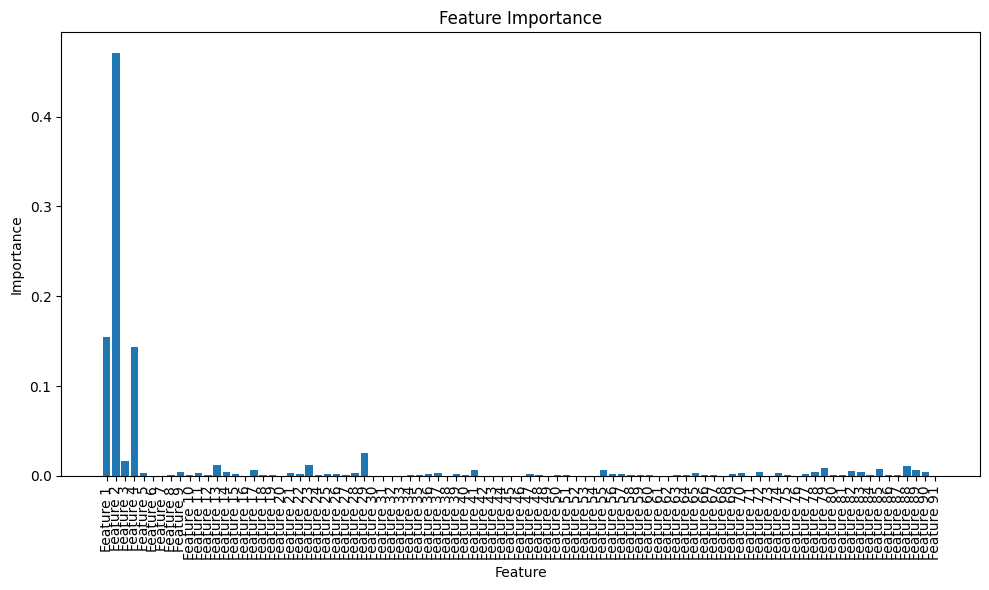

In [82]:
feature_names = [f'Feature {i+1}' for i in range(len(feature_importance))]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)  # x축 레이블 회전
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [77]:
X_future

,단지명길이,전용면적(㎡),층,건물나이,광산구 도산동,광산구 도천동,광산구 비아동,광산구 산월동,광산구 산정동,광산구 선암동,...,서구 동천동,서구 마륵동,서구 매월동,서구 쌍촌동,서구 양동,서구 유촌동,서구 치평동,서구 풍암동,서구 화정동,남구 주월동
0,2,105,10,33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
